## Execute Cluster Analysis

In [12]:
import pandas as pd
from pandas import DataFrame

from sklearn.cluster import KMeans

from sklearn import preprocessing
import seaborn as sns

le = preprocessing.LabelEncoder()
scalar = preprocessing.MinMaxScaler()
sns.set()

#### Define functions

In [2]:
def run_kmeans_for_k(_x: DataFrame, _k: int) -> tuple:
    kmeans = KMeans(n_clusters=_k, init='k-means++', max_iter=200, n_jobs=2, random_state=1)
    kmeans.fit(_x)
    _labels = pd.DataFrame(kmeans.labels_, columns=['label'])
    x_labelled = pd.concat([_x, _labels], axis=1)
    return x_labelled, kmeans.inertia_

def run_kmeans(_x: DataFrame, min_k: int, max_k: int) -> DataFrame:
    _inertia_df = pd.DataFrame(columns=['k', 'inertia'])
    for k in range(min_k, max_k+1):
        _x_labelled, _inertia = run_kmeans_for_k(_x, k)
        _inertia_df = _inertia_df.append({'k': k, 'inertia': _inertia}, ignore_index=True)
        print(k, _inertia)
    return _inertia_df

#### Read training dataset from pickle file

In [3]:
master: DataFrame = pd.read_pickle('./data/master.pickle')
print(master.shape)

(344667, 119)


#### Select features for the cluster analysis

In [4]:
features = ['Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 
              'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Store', 'Dept', 'Year', 'Month']

_master_features: DataFrame = master[features]
print(_master_features.shape)

(344667, 17)


#### Encode labels for the categorical variables (to calculate Euclidean distance)

In [5]:
_master_encoded: DataFrame = _master_features.apply(le.fit_transform)

#### Scale the features based on MinMax (to calculate Euclidean distance)

In [6]:
_master_array = scalar.fit_transform(_master_encoded)
master_scaled = pd.DataFrame(_master_array, columns=features)

#### Running cluster analysis

In [14]:
inertia_list_1 = run_kmeans(master_scaled, 1, 10)
print(inertia_list_1.shape)

1 475505.18198258517
2 377819.35769959044
3 331380.34964605083
4 309250.8789238843
5 292181.46070563025
6 274590.58327141433
7 265099.1307451487
8 257502.68326608473
9 249774.7919228446
10 239601.6089127989
      k        inertia
0   1.0  475505.181983
1   2.0  377819.357700
2   3.0  331380.349646
3   4.0  309250.878924
4   5.0  292181.460706
5   6.0  274590.583271
6   7.0  265099.130745
7   8.0  257502.683266
8   9.0  249774.791923
9  10.0  239601.608913


In [15]:
inertia_list_2 = run_kmeans(master_scaled, 11, 15)
print(inertia_list_2.shape)

11 232716.26395141653
12 226970.89900902452
13 222564.674942369
14 217436.7697258553
15 213942.4855117169
(5, 2)


In [16]:
inertia_list_3 = run_kmeans(master_scaled, 16, 20)
print(inertia_list_3.shape)

16 208518.0983712222
17 204255.25101467455
18 201883.06055829424
19 198160.99915274713
20 195484.02855617667
(5, 2)


In [19]:
inertia_list_all = pd.concat([inertia_list_1, inertia_list_2, inertia_list_3])
print(inertia_list_all.head(20))

      k        inertia
0   1.0  475505.181983
1   2.0  377819.357700
2   3.0  331380.349646
3   4.0  309250.878924
4   5.0  292181.460706
5   6.0  274590.583271
6   7.0  265099.130745
7   8.0  257502.683266
8   9.0  249774.791923
9  10.0  239601.608913
0  11.0  232716.263951
1  12.0  226970.899009
2  13.0  222564.674942
3  14.0  217436.769726
4  15.0  213942.485512
0  16.0  208518.098371
1  17.0  204255.251015
2  18.0  201883.060558
3  19.0  198160.999153
4  20.0  195484.028556


#### Plotting the cluster analysis results

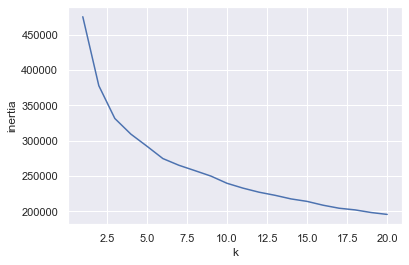

In [18]:
sns.lineplot(x='k', y='inertia', data=inertia_list_all)
